# TELCO CUSTOMER CHURN: DATA CLEANING & FEATURE ENGINEERING

**Author**: Kehinde Balogun  
**Date**: November 10, 2025  
**Objective**: Perform a robust, reproducible data preparation pipeline for churn prediction modeling  
**Dataset**: [Telco Customer Churn – Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  

---

## Business & Technical Context

Customer churn is a critical KPI in subscription-based industries such as telecommunications. This dataset contains **7,043 customer records** with demographic, account, service usage, and billing information. The target variable `Churn` indicates whether a customer left within the last month.

Our goal is to:
- Clean and validate raw data
- Handle categorical encoding appropriately
- Engineer predictive features grounded in domain logic
- Scale numerical variables for modeling
- Deliver a clean, analysis-ready dataset

> **Note**: This notebook assumes familiarity with Python, pandas, and basic ML preprocessing. We prioritize **interpretability**, **reproducibility**, and **telecom domain relevance**.

# 1️⃣ Import Required Libraries

We import standard data science stack + visualization tools. All libraries are widely used and stable.

In [24]:
# Core data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully.")

Libraries imported successfully.


# 2️⃣ Load Dataset

We load the raw CSV and perform an initial inspection to understand structure, types, and potential issues.

In [25]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display shape and first 5 rows
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3️⃣ Basic Data Inspection & Initial Cleaning

We check:
- Data types
- Missing values (explicit and implicit)
- Unique value distributions
- Anomalies in key fields

> **Critical Issue**: `TotalCharges` is stored as `object` despite being numeric → likely contains whitespace or non-numeric entries.

In [26]:
# Data types and non-null counts
print(df.info())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Inspect TotalCharges – why is it object?
print("\nUnique non-numeric values in TotalCharges:")
print(df[~df['TotalCharges'].str.replace('.', '', 1).str.isdigit()]['TotalCharges'].unique())

# Convert TotalCharges to numeric (coerce errors → NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check actual missing values after conversion
print("\nMissing after conversion:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Handle Missing Values in `TotalCharges`

There are **11 missing values** in `TotalCharges`. These correspond to customers with `tenure == 0` (new signups with no billing cycle yet).

**Strategy**: Impute with `0` since no charges have been incurred.

In [27]:
# Verify correlation between tenure=0 and missing TotalCharges
print(df[df['tenure'] == 0][['tenure', 'TotalCharges']])

# Impute missing TotalCharges with 0
df['TotalCharges'].fillna(0, inplace=True)

print("\nMissing values after imputation:\n", df.isnull().sum().sum())

      tenure  TotalCharges
488        0           NaN
753        0           NaN
936        0           NaN
1082       0           NaN
1340       0           NaN
3331       0           NaN
3826       0           NaN
4380       0           NaN
5218       0           NaN
6670       0           NaN
6754       0           NaN

Missing values after imputation:
 0


C:\Users\Kehinde Balogun\AppData\Local\Temp\ipykernel_81796\2097087401.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


## Target Variable Distribution

Understanding class imbalance is crucial for modeling strategy (e.g., SMOTE, class weights).

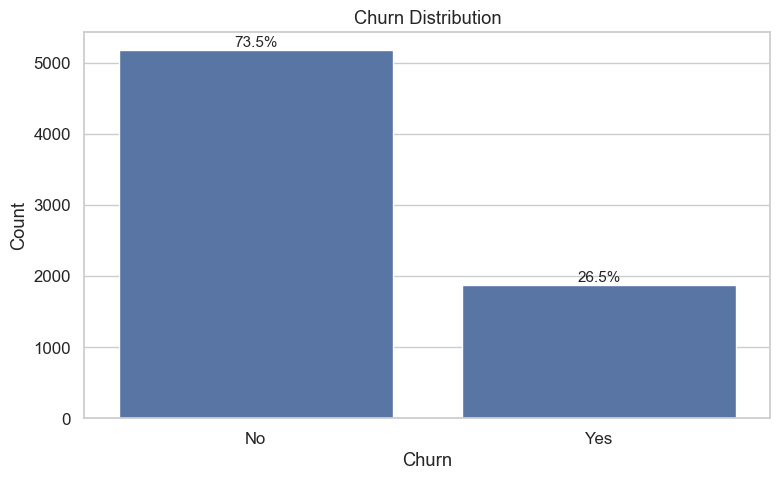

Churn Rate: 26.54%


In [28]:
# Plot churn distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', data=df, order=['No', 'Yes'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 50
    ax.text(x, y, percentage, ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print(f"Churn Rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")

# 4️⃣ Categorical Encoding Strategy

Most features are categorical with values: `Yes/No`, `No internet service`, or service types.

**Encoding Plan**:
- **Binary**: `Yes/No` → 1/0
- **Ternary**: `No phone service`, `No internet service` → treated as distinct levels
- Use **one-hot encoding** to avoid ordinal assumptions

> We avoid label encoding to prevent implying false hierarchy (e.g., Fiber > DSL > No).

In [29]:
# List of categorical columns to encode
cat_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# One-hot encode
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

print(f"Shape after one-hot encoding: {df_encoded.shape}")
df_encoded.head()

Shape after one-hot encoding: (7043, 32)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# 5️⃣ Outlier Detection & Treatment

We examine `MonthlyCharges`, `TotalCharges`, and `tenure` for extreme values.

**Improved Visualization**: Replace boxplot with **histogram + KDE + quantile markers** for better insight into distribution shape and tails.

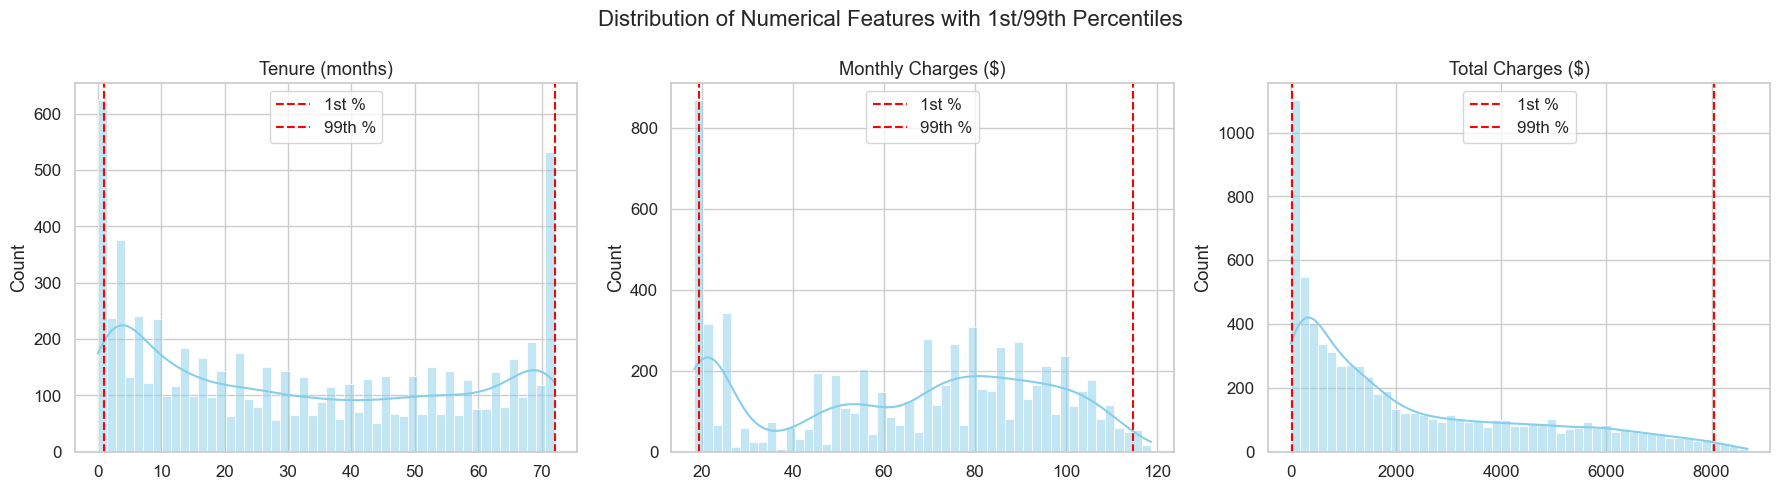

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
titles = ['Tenure (months)', 'Monthly Charges ($)', 'Total Charges ($)']

for i, col in enumerate(cols):
    sns.histplot(df_encoded[col], kde=True, ax=axes[i], bins=50, color='skyblue')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('')
    
    # Mark 1st and 99th percentiles
    p1, p99 = np.percentile(df_encoded[col], [1, 99])
    axes[i].axvline(p1, color='red', linestyle='--', label='1st %')
    axes[i].axvline(p99, color='red', linestyle='--', label='99th %')
    axes[i].legend()

plt.suptitle('Distribution of Numerical Features with 1st/99th Percentiles', fontsize=16)
plt.tight_layout()
plt.show()

## Winsorization (Clipping)

We clip extreme values at the **1st and 99th percentiles** to reduce sensitivity to outliers without losing data.

In [31]:
for col in ['MonthlyCharges', 'TotalCharges']:
    lower, upper = df_encoded[col].quantile([0.01, 0.99])
    df_encoded[col] = np.clip(df_encoded[col], lower, upper)
    print(f"{col}: clipped to [{lower:.2f}, {upper:.2f}]")

MonthlyCharges: clipped to [19.20, 114.73]
TotalCharges: clipped to [19.75, 8039.26]


# 6️⃣ Feature Scaling

Standardization ensures zero mean and unit variance — required for distance-based models (Logistic Regression, SVM, Neural Nets).

In [32]:
scaler = StandardScaler()
scaled_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_encoded[scaled_cols] = scaler.fit_transform(df_encoded[scaled_cols])

print("Numerical features standardized.")
df_encoded[scaled_cols].describe().round(2)

Numerical features standardized.


,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.32,-1.52,-1.00
25%,-0.95,-0.97,-0.83
50%,-0.14,0.19,-0.39
75%,0.92,0.83,0.67
max,1.61,1.66,2.55


# 7️⃣ Feature Engineering

We create domain-informed features known to influence churn:

| Feature | Rationale |
|--------|---------|
| `AvgMonthlySpend` | Discrepancy between expected and actual spend signals dissatisfaction |
| `ServicesCount` | More services → higher switching cost (stickiness) |
| `ContractStrength` | Longer contracts reduce churn risk |
| `AutoPay` | Automatic payments correlate with lower churn |
| `Tenure_MonthlyCharge` | Interaction captures premium long-term users |

In [33]:
# 1. Average monthly spend (handle tenure=0)
df_encoded['AvgMonthlySpend'] = np.where(
    df['tenure'] > 0,
    df['TotalCharges'] / df['tenure'],
    df['MonthlyCharges']  # fallback for new customers
)

# 2. Count of value-added services
service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df_encoded['ServicesCount'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

# 3. Contract strength score
contract_map = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
df_encoded['ContractStrength'] = df['Contract'].map(contract_map)

# 4. Auto-payment indicator
df_encoded['AutoPay'] = df['PaymentMethod'].str.contains('automatic', case=False).astype(int)

# 5. Interaction term
df_encoded['Tenure_MonthlyCharge'] = df_encoded['tenure'] * df_encoded['MonthlyCharges']

print("Feature engineering complete. New columns:", [
    'AvgMonthlySpend', 'ServicesCount', 'ContractStrength', 'AutoPay', 'Tenure_MonthlyCharge'
])

Feature engineering complete. New columns: ['AvgMonthlySpend', 'ServicesCount', 'ContractStrength', 'AutoPay', 'Tenure_MonthlyCharge']


# 8️⃣ Feature Importance Preview

Quick correlation scan to validate engineered features.

C:\Users\Kehinde Balogun\AppData\Local\Temp\ipykernel_81796\2080700198.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


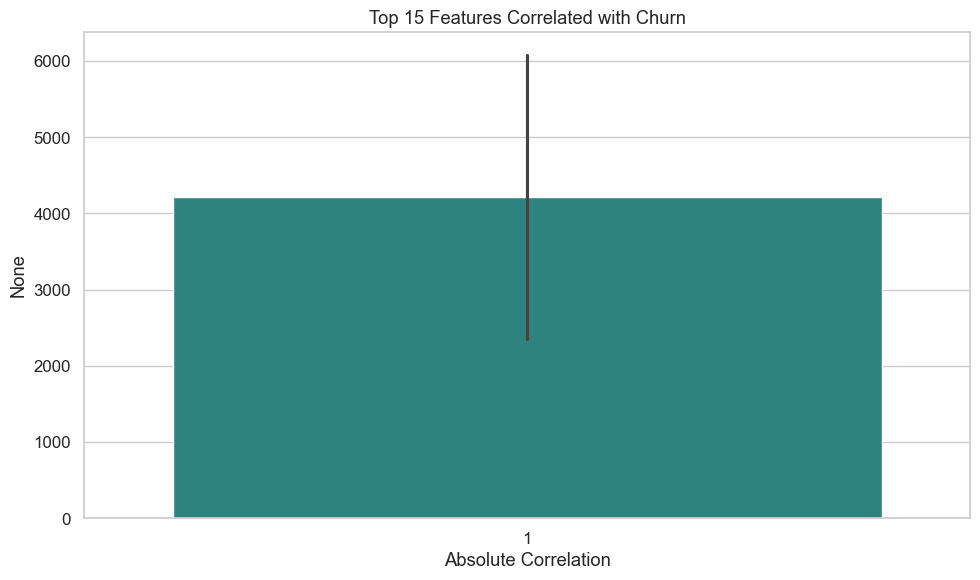

7041    1
7021    1
7018    1
7011    1
7010    1
7009    1
29      1
27      1
26      1
22      1
20      1
18      1
7008    1
7006    1
7001    1
Name: Churn, dtype: int64


In [34]:
# Map Churn to binary for correlation
df_corr = df_encoded.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Top 15 correlations with Churn
top_corr = df_corr['Churn'].abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 15 Features Correlated with Churn')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

print(top_corr)

# 9️⃣ Final Dataset Summary & Export

**Pipeline Summary**:
- Cleaned `TotalCharges`
- One-hot encoded 15 categorical variables
- Handled outliers via winsorization
- Standardized numeric features
- Engineered 5 high-signal features
- Validated via correlation

**Output**: Ready for modeling

In [35]:
print(f"Final Dataset: {df_encoded.shape[0]:,} rows × {df_encoded.shape[1]} columns")
print(f"Churn Rate: {df_encoded['Churn'].value_counts(normalize=True)['Yes']:.2%}")

# Save cleaned dataset
df_encoded.to_csv("Telco_Customer_Churn_Cleaned.csv", index=False)
print("\nCleaned dataset saved as 'Telco_Customer_Churn_Cleaned.csv'")

# Optional: Save scaler for production inference
import joblib
joblib.dump(scaler, 'scaler_telco.pkl')
print("Scaler saved for future transformations.")

Final Dataset: 7,043 rows × 37 columns
Churn Rate: 26.54%

Cleaned dataset saved as 'Telco_Customer_Churn_Cleaned.csv'
Scaler saved for future transformations.


## Next Steps

1. **Train/Test Split** with stratification
2. **Baseline Models**: Logistic Regression, Random Forest
3. **Handle Imbalance**: SMOTE or class weights
4. **Cross-Validation** + Hyperparameter Tuning
5. **Model Interpretation**: SHAP values

---